In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,la vida by tata housing,sector 113,1.55,11654.0,1330.0,Super Built up area 1330(123.56 sq.m.)Built Up...,2.0,2.0,3,2.0,North-East,New Property,1330.0,1276.0,1180.0,0,0,0,0,0,0,174,665.000000
1,flat,vatika city,sector 49,3.60,11921.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15,755.000000
2,flat,godrej nature plus,sector 33,1.40,15119.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70,308.666667
3,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50,300.000000
4,flat,microtek greenburg,sector 86,1.25,8446.0,1480.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,13.0,West,Moderately Old,1480.0,NaN,NaN,1,0,0,0,0,0,6,740.000000


In [5]:
df.isnull().sum()

property_type             0
society                   2
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1684
built_up_area          1970
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

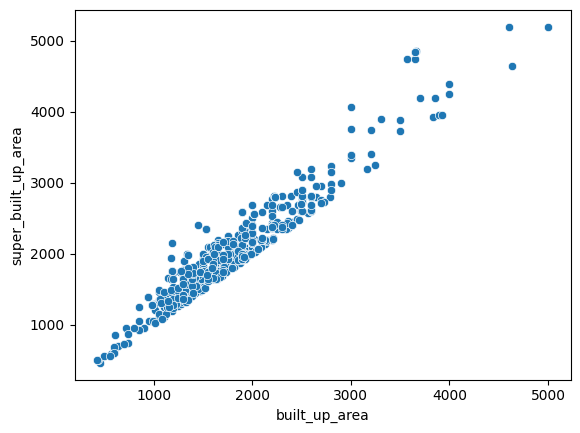

In [7]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

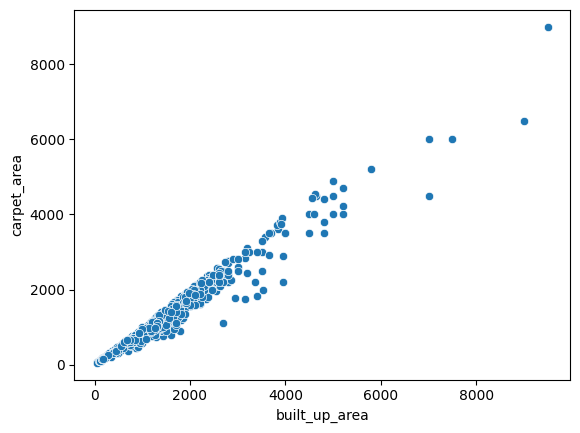

In [9]:
sns.scatterplot(data = df, x='built_up_area', y='carpet_area')


In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554    False
3555    False
Length: 3556, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(530, 24)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052289815447711 0.900140056022409


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,godrej nature plus,sector 33,1.40,15119.0,926.0,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,3+,20.0,NaN,New Property,145.0,NaN,86.0,0,0,0,0,0,0,70,308.666667
22,flat,dlf the primus,sector 82a,2.70,10481.0,2576.0,Super Built up area 2576(239.32 sq.m.)Carpet a...,4.0,4.0,3+,18.0,East,Moderately Old,2576.0,NaN,1306.0,0,1,0,0,0,0,38,644.000000
43,flat,chd avenue,sector 71,1.15,6527.0,1762.0,Super Built up area 1762(163.7 sq.m.)Carpet ar...,3.0,3.0,2,15.0,East,Moderately Old,1762.0,NaN,1339.0,0,1,0,0,0,1,66,587.333333
47,flat,shyam apartment,sector 3,0.26,2512.0,1035.0,Super Built up area 700(65.03 sq.m.)Carpet are...,2.0,1.0,2,2.0,NaN,Relatively New,700.0,NaN,530.0,0,0,0,0,0,0,0,517.500000
55,flat,emaar gurgaon greens,sector 102,1.40,8485.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,9.0,South-West,Relatively New,1650.0,NaN,1200.0,0,1,0,0,0,0,49,550.000000


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\ranja\AppData\Local\Temp\ipykernel_560\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_560\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

property_type             0
society                   2
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1684
built_up_area          1549
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [23]:
# super built up area present carpet area is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [24]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,microtek greenburg,sector 86,1.25,8446.0,1480.0,Super Built up area 1480(137.5 sq.m.),2.0,2.0,3,13.0,West,Moderately Old,1480.0,NaN,NaN,1,0,0,0,0,0,6,740.00
5,flat,tulip violet,sector 69,1.52,9632.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,4.0,South-West,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,1,156,526.00
7,flat,dlf the ultima,sector 81,2.40,11412.0,2103.0,Super Built up area 2103(195.38 sq.m.),3.0,4.0,3+,19.0,North-West,Relatively New,2103.0,NaN,NaN,0,1,0,0,0,2,174,701.00
9,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,Super Built up area 4890(454.3 sq.m.),4.0,6.0,3+,25.0,West,Relatively New,4890.0,NaN,NaN,0,1,0,1,0,1,119,1222.75
12,flat,tulip violet,sector 69,2.05,9951.0,2060.0,Super Built up area 2087(193.89 sq.m.),4.0,4.0,2,0.0,North-West,Relatively New,2087.0,NaN,NaN,0,0,0,0,0,0,157,515.00


In [25]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\ranja\AppData\Local\Temp\ipykernel_560\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_560\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(s

In [26]:
df.update(sb_df)

In [27]:
df.isnull().sum()

property_type             0
society                   2
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1684
built_up_area           676
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [28]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [29]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,vatika city,sector 49,3.60,11921.0,3020.0,Carpet area: 3020 (280.57 sq.m.),4.0,5.0,3,7.0,NaN,Moderately Old,NaN,NaN,3020.0,0,1,0,1,0,2,15,755.000000
3,flat,ramprastha primera,sector 37d,1.20,13333.0,900.0,Carpet area: 900 (83.61 sq.m.),3.0,3.0,3,5.0,North-East,Relatively New,NaN,NaN,900.0,0,0,1,0,0,0,50,300.000000
8,flat,dlf new town heights,sector 90,1.25,8639.0,1447.0,Carpet area: 1447 (134.43 sq.m.),3.0,4.0,3+,0.0,North-West,Old Property,NaN,NaN,1447.0,0,1,0,0,0,2,31,482.333333
10,flat,whiteland the aspen,sector 76,3.35,17613.0,1902.0,Carpet area: 1900 (176.52 sq.m.),3.0,4.0,3+,5.0,North-East,Under Construction,NaN,NaN,1900.0,0,1,0,0,0,2,151,634.000000
14,flat,dlf city plots phase,sector 24,6.50,18571.0,3500.0,Carpet area: 3500 (325.16 sq.m.),4.0,5.0,3+,3.0,North-East,New Property,NaN,NaN,3500.0,0,1,0,0,0,2,42,875.000000


In [30]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\ranja\AppData\Local\Temp\ipykernel_560\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_560\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_a

In [31]:
df.update(c_df)

In [32]:
df.isnull().sum()

property_type             0
society                   2
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1684
built_up_area             0
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

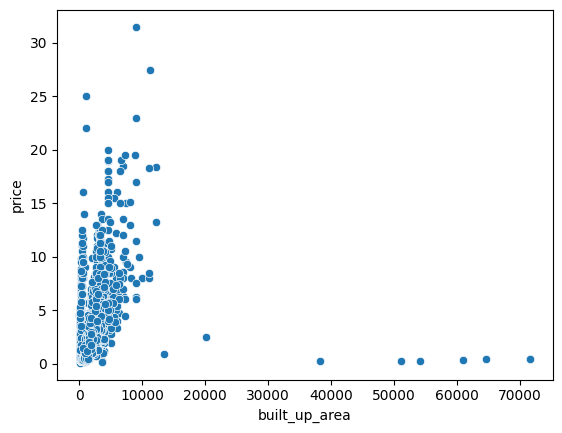

In [34]:
sns.scatterplot(data=df, x='built_up_area', y='price')


In [35]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [55]:
anamoly_df.sample(5)

,price,area,built_up_area
3134,5.25,1350.0,1350.0
3303,2.60,2441.0,2441.0
70,4.25,1836.0,1836.0
22,2.70,2576.0,2576.0
3238,12.50,1175.0,1175.0


In [57]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [59]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

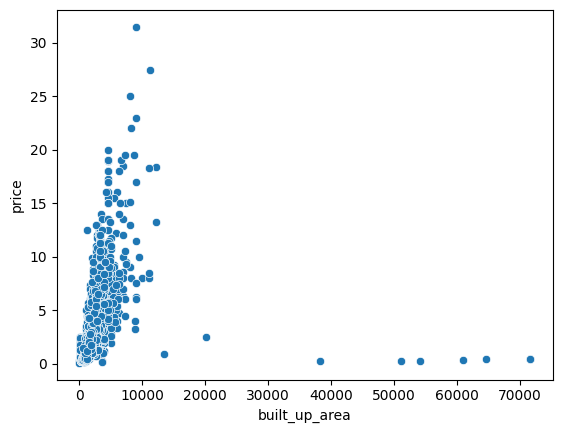

In [60]:
sns.scatterplot(data=df, x='built_up_area', y='price')


In [61]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [62]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,la vida by tata housing,sector 113,1.55,11654.0,2.0,2.0,3,2.0,North-East,New Property,1276.0,0,0,0,0,0,0,174
1,flat,vatika city,sector 49,3.60,11921.0,4.0,5.0,3,7.0,NaN,Moderately Old,3356.0,0,1,0,1,0,2,15
2,flat,godrej nature plus,sector 33,1.40,15119.0,3.0,2.0,3+,20.0,NaN,New Property,113.0,0,0,0,0,0,0,70
3,flat,ramprastha primera,sector 37d,1.20,13333.0,3.0,3.0,3,5.0,North-East,Relatively New,1000.0,0,0,1,0,0,0,50
4,flat,microtek greenburg,sector 86,1.25,8446.0,2.0,2.0,3,13.0,West,Moderately Old,1339.0,1,0,0,0,0,0,6


In [64]:
df.isnull().sum()

property_type         0
society               2
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [65]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
61,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
669,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
795,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
804,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1008,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1011,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1067,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
1077,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1115,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2612,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0


In [66]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [67]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\ranja\AppData\Local\Temp\ipykernel_560\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [68]:
df.isnull().sum()

property_type         0
society               2
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [69]:
1011/df.shape[0]

0.28430821147356583

### facing

<Axes: ylabel='count'>

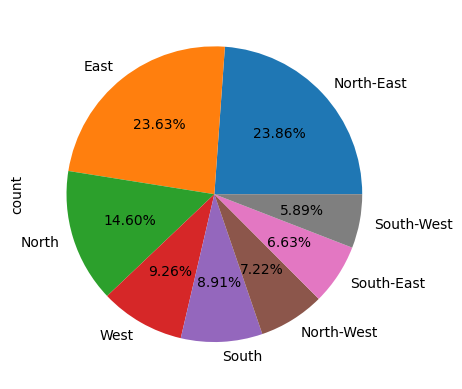

In [70]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [71]:
df.drop(columns=['facing'],inplace=True)

In [72]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2891,house,independent,sector 105,0.55,10913.0,2.0,4.0,0,2.0,Undefined,56.0,0,0,0,0,0,0,0
3049,house,signature global city,sector 37d,1.27,8089.0,3.0,3.0,3,4.0,Under Construction,1570.0,0,0,0,1,0,0,89
3408,flat,raheja navodaya,sector 92,0.85,5407.0,3.0,3.0,0,0.0,Relatively New,1423.0,0,0,0,0,0,0,88
1377,flat,mittal cosmos executive apartments,sector 2,0.75,6550.0,2.0,2.0,2,15.0,Old Property,1100.0,0,0,0,0,0,1,42
3215,house,independent,sector 46,2.40,2963.0,4.0,4.0,3,3.0,Moderately Old,900.0,0,0,1,0,0,1,44


In [73]:
df.isnull().sum()

property_type      0
society            2
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
df.shape

(3555, 18)

In [78]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
199,flat,NaN,gwal pahari,7.0,10999.0,4.0,4.0,3+,6.0,Relatively New,5430.0,0,1,0,0,0,0,52
804,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [79]:
df.drop(index=[199, 804],inplace=True)

In [80]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [81]:
df['agePossession'].value_counts()

agePossession
Relatively New        1608
New Property           558
Moderately Old         543
Old Property           293
Undefined              290
Under Construction     261
Name: count, dtype: int64

In [82]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
17,house,independent,sector 56,2.95,20233.0,2.0,2.0,0,1.0,Undefined,1458.0,0,0,0,0,0,0,0
26,house,independent,sector 36,0.75,6938.0,3.0,1.0,0,1.0,Undefined,1081.0,0,0,0,0,0,0,0
27,flat,aipl joy square,sector 63a,0.70,10101.0,1.0,1.0,0,7.0,Undefined,693.0,0,0,0,0,0,0,0
41,flat,aipl peaceful homes,sector 70a,2.75,12791.0,3.0,3.0,3+,14.0,Undefined,2150.0,0,0,0,0,0,0,0
44,flat,satya element one,sector 49,0.94,14009.0,1.0,2.0,2,2.0,Undefined,746.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,flat,smartworld one dxp,sector 113,2.00,11074.0,3.0,3.0,3,12.0,Undefined,1806.0,0,0,0,0,0,0,70
3488,house,independent,sector 39,0.34,7556.0,1.0,1.0,1,1.0,Undefined,450.0,0,0,0,0,0,0,0
3517,flat,raheja vedaanta,sector 108,1.00,4854.0,2.0,2.0,2,0.0,Undefined,2060.0,0,0,0,0,0,0,0
3527,flat,sidhartha ncr one,sector 95,0.55,5556.0,2.0,2.0,3,15.0,Undefined,990.0,0,0,0,0,0,0,0


In [83]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [84]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [85]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
New Property           586
Moderately Old         581
Old Property           325
Under Construction     275
Undefined               54
Name: count, dtype: int64

In [86]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [87]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [88]:
df['agePossession'].value_counts()

agePossession
Relatively New        1742
Moderately Old         588
New Property           587
Old Property           328
Under Construction     275
Undefined               33
Name: count, dtype: int64

In [89]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [90]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [91]:
df['agePossession'].value_counts()

agePossession
Relatively New        1744
Moderately Old         619
New Property           587
Old Property           328
Under Construction     275
Name: count, dtype: int64

In [92]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [93]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [464]:
df.shape

(3554, 18)